# formative Assessment [Unsupervised Learning]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


first few rows of the dataset

In [21]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


last few rows of the dataset

In [22]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Drop the species column

In [23]:

df = df.drop('species', axis=1)

Print the columns

In [25]:

print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


The info provided describes the structure of your DataFrame for the Iris dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


summary statistics for the Iris dataset

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

there are no missing values in Iris dataset, as each column has 0 missing entries.

 boxplot for each feature(finding the outliners)

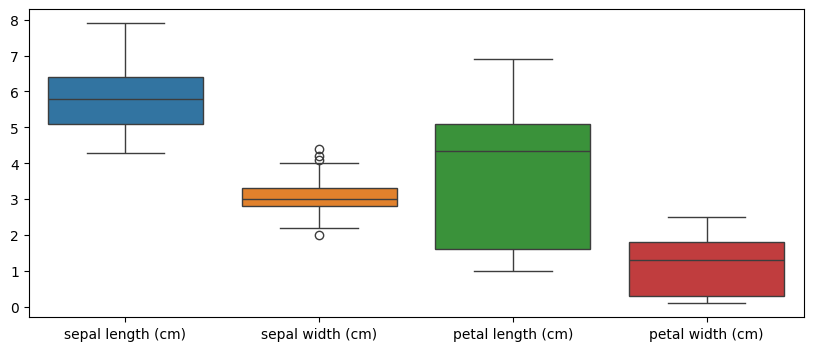

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
sns.boxplot(data=df)
plt.show()


The boxplot visualization helps in identifying outliers in dataset

sepal width outlinears removing



In [15]:
sw_Q1=df["sepal width (cm)"].quantile(0.25)
sw_Q3=df["sepal width (cm)"].quantile(0.75)
sw_IQR=sw_Q3-sw_Q1
print("sepal width Q1-",sw_Q1)
print("sepal width Q3-",sw_Q3)

sepal width Q1- 2.8
sepal width Q3- 3.3



Q1-1.5IQR,Q3+1.5IQR(threshold value equation)(finding threshold values)

In [16]:
t1=sw_Q1-1.5*sw_IQR
t3=sw_Q3+1.5*sw_IQR
print(t1)
print(t3)


2.05
4.05


identify the outliers

In [17]:
outlier_sw=df[(df["sepal width (cm)"] < t1) | (df["sepal width (cm)"] > t3)]
outlier_sw


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [27]:
cleaned_df=df[(df["sepal width (cm)"] > t1) & (df["sepal width (cm)"] < t3)]
cleaned_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Clustering Algorithm Implementation

A) KMeans Clustering

Brief Description: KMeans clustering is a type of unsupervised learning algorithm that groups similar data points into clusters based on their features. It works by initializing centroids randomly, assigning each data point to the closest centroid, and then updating the centroids based on the mean of all data points assigned to each centroid.

Why KMeans is suitable for Iris dataset: KMeans clustering is suitable for the Iris dataset because it has a small number of features  and a relatively small number of samples  Additionally, the Iris dataset is known to have distinct clusters, making KMeans a good choice for identifying these clusters.

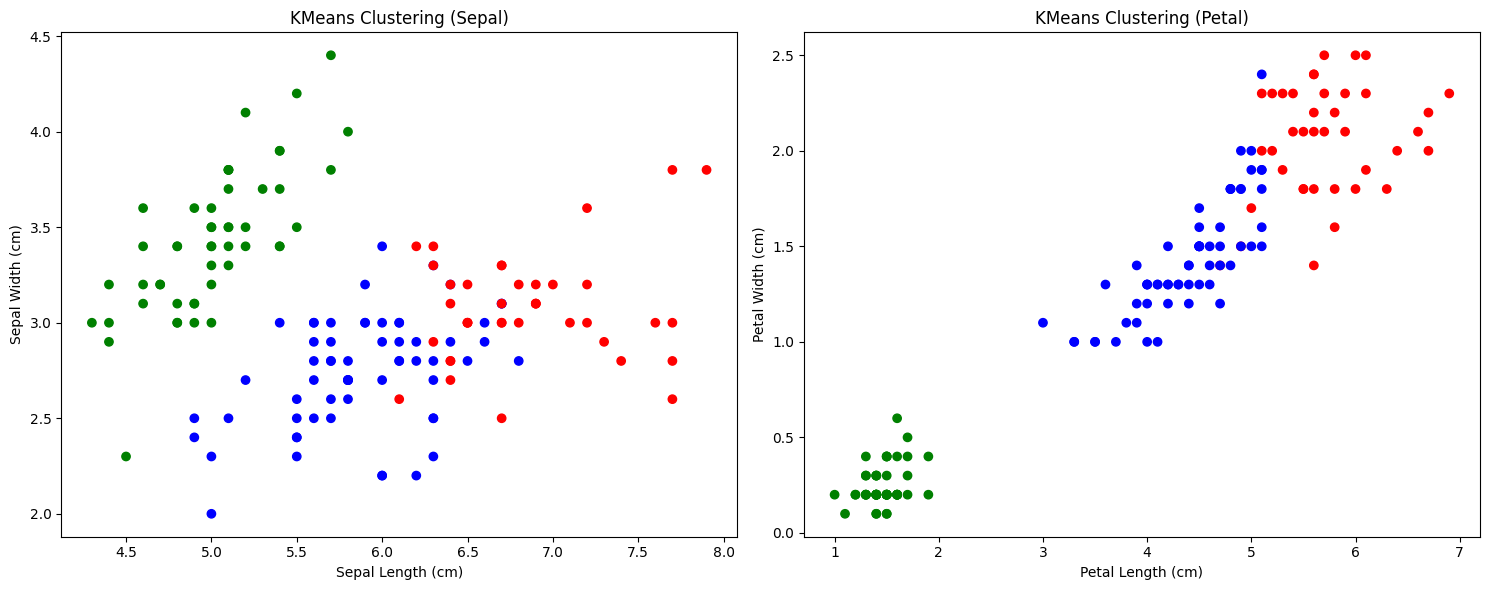

In [35]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Define colors for the clusters
COLORS = ['r', 'g', 'b']

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Visualize the clusters
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=[COLORS[i] for i in kmeans.labels_])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering (Sepal)')

plt.subplot(1, 2, 2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=[COLORS[i] for i in kmeans.labels_])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Clustering (Petal)')

plt.tight_layout()
plt.show()

The first subplot shows the clusters using sepal length (cm) and sepal width (cm) 

The second subplot shows the clusters using petal length (cm) and petal width (cm)

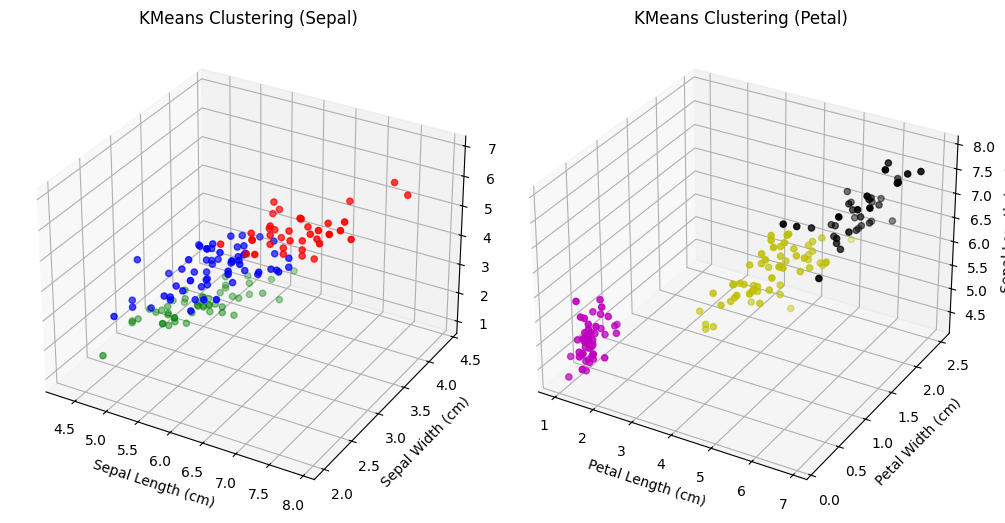

In [41]:

from mpl_toolkits.mplot3d import Axes3D

# Define colors for the clusters
SEPAL_COLORS = ['r', 'g', 'b']
PETAL_COLORS = ['black', 'm', 'y']

# Visualize the clusters (Sepal)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], c=[SEPAL_COLORS[i] for i in kmeans.labels_])
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('KMeans Clustering (Sepal)')

# Visualize the clusters (Petal)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(df['petal length (cm)'], df['petal width (cm)'], df['sepal length (cm)'], c=[PETAL_COLORS[i] for i in kmeans.labels_])
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Sepal Length (cm)')
ax.set_title('KMeans Clustering (Petal)')

plt.tight_layout()
plt.show()

# B) Hierarchical Clustering

Brief Description: Hierarchical clustering is a type of unsupervised learning algorithm that builds a hierarchy of clusters by merging or splitting existing clusters. It works by calculating the distance between each pair of data points and then grouping them into clusters based on their similarity.

Why Hierarchical clustering is suitable for Iris dataset: Hierarchical clustering is suitable for the Iris dataset because it can handle datasets with varying densities and can identify clusters of varying sizes.

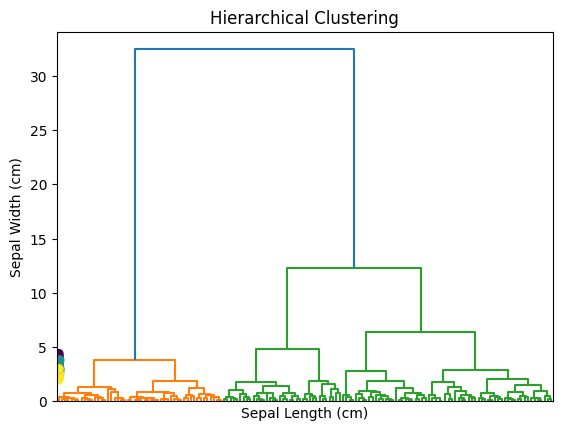

In [49]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Apply Hierarchical clustering
Z = linkage(df, method='ward')

# Visualize the dendrogram
dendrogram(Z, no_labels=True)

# Form flat clusters
clusters = fcluster(Z, 3, criterion='maxclust')

# Visualize the clusters
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=clusters)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Hierarchical Clustering')
plt.show()